In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import math

In [3]:
batch_size = 1001

In [5]:
n_hidden = 50

In [9]:
hidden_layer = tf.nn.tanh(tf.matmul(x, Wh) + bh)
theta = tf.matmul(hidden_layer, Wo) + bo

### Loss related

In [10]:
oneDivSqrtTwoPI = tf.constant(1 / math.sqrt(2*math.pi)) # normalisation factor for gaussian, not needed.
def tf_normal(y, mu, sigma):
    result = tf.subtract(y, mu)
    result = tf.divide(result,sigma)
    result = -tf.square(result)/2
    return tf.divide(tf.exp(result),sigma)*oneDivSqrtTwoPI

In [11]:
# On utilise un signe moins pour minimiser moins l'entropie

In [27]:
def get_density(out_pi, out_sigma, out_mu, y):
    result = tf_normal(y, out_mu, out_sigma)
    result = tf.multiply(result, out_pi)
    result = tf.reduce_sum(result, 1, keep_dims=True)
    return result

In [28]:
def get_lossfunc(out_pi, out_sigma, out_mu, y):
    result = get_density(out_pi, out_sigma, out_mu, y)
    result = -tf.log(result) 
    return tf.reduce_mean(result)

In [13]:
def get_mixture_coef(theta):
    out_pi, out_sigma, out_mu = tf.split(theta, num_or_size_splits=3,axis=1)
    max_pi = tf.reduce_max(out_pi, 1, keep_dims=True)
    out_pi = tf.subtract(out_pi, max_pi)
    out_pi = tf.exp(out_pi)
    normalize_pi = tf.divide(out_pi, tf.reduce_sum(out_pi, keep_dims=True))
    out_sigma = tf.exp(out_sigma)
    return out_pi, out_sigma, out_mu

In [ ]:
# TODO : utiliser la fonction softmax a la place pour les poids

In [14]:
out_pi, out_sigma, out_mu = get_mixture_coef(theta)

In [15]:
loss = get_lossfunc(out_pi, out_sigma, out_mu, y)

In [16]:
train_op = tf.train.AdamOptimizer().minimize(loss)

In [17]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [18]:
x_data = np.float32(np.random.uniform(-10.5, 10.5, (dim_x, batch_size))).T

In [19]:
y_data = np.float32(np.random.uniform(-10.5, 10.5, (1, batch_size))).T

In [20]:
sess.run(train_op, feed_dict={x: x_data, y: y_data})

In [21]:
loss_list  = []

In [22]:
for i in range(10000):
    sess.run(train_op, feed_dict={x: x_data, y: y_data})
    loss_val = sess.run(loss, feed_dict={x: x_data, y: y_data})
    loss_list.append(loss_val)

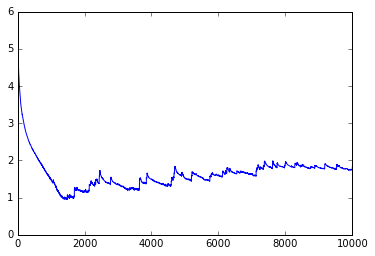

In [23]:
plt.plot(loss_list)

In [24]:
# TODO : save the value of theta for which the loss is minimized

### Getting the predicted $\theta$

In [31]:
sess.run(get_mixture_coef(theta), feed_dict={x: x_data})

(array([[ 0.99349481,  0.99443448,  0.99701983, ...,  1.        ,
          0.9974227 ,  0.99638021],
        [ 0.99584645,  0.9981702 ,  0.99870092, ...,  1.        ,
          0.99795908,  0.99886173],
        [ 0.9973309 ,  0.99545157,  0.99825913, ...,  0.99803686,
          1.        ,  0.99833864],
        ..., 
        [ 0.9982751 ,  0.99492365,  1.        , ...,  0.99603248,
          0.99719524,  0.99780315],
        [ 0.9964819 ,  0.99495518,  0.99972135, ...,  0.99427032,
          1.        ,  0.9999187 ],
        [ 0.99650991,  0.99662209,  0.99664468, ...,  0.99677461,
          1.        ,  0.99790436]], dtype=float32),
 array([[  2.52594094e-04,   4.01074886e+00,   2.59192944e+00, ...,
           1.31938591e+01,   8.56280531e-05,   7.55374655e-02],
        [  2.16336521e-05,   1.43758163e+02,   2.07769132e-04, ...,
           2.04472691e-02,   1.65203492e-05,   8.54455853e+00],
        [  2.13565683e+00,   5.68151108e-07,   2.13519603e-01, ...,
           6.03397563e-03